\mainmatter

# (PART) Get Started {-}

In [1]:
if (basename(getwd())!= "tutorials"){
  setwd(gsub("(tutorials).*","\\1",getwd())) # little trick to get notebooks wokring on local machines
}

# Read NetCDF in R {#intro-read}

First you need to install some R packages in order to read the NetCDF data into your R environment:

In [2]:
install.packages('netcdf4')
install.packages('netcdf4.helpers')

Installing package into '\\WURNET.NL/Homes/nauta008/My Documents/R/win-library/3.5'
(as 'lib' is unspecified)

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="\\WURNET.NL/Homes/nauta008/My Documents/R/win-library/3.5": Access is denied"


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror


## Explore NetCDF {#intro-read-explore}

Now we use the R package to load an example NetCDF dataset into R. The function `nc_open` opens a data stream, but does not yet load all the data into the memory. We can use the netcdf4.helpers package to request some more information about the NetCDF dataset. For instance, we can requests the dates.

In [3]:
library(ncdf4)
library(ncdf4.helpers)

nc <- ncdf4::nc_open("data/OUT_EVAP_monthly_1971.nc") # or slimply use nc_open()
datetimes <- ncdf4.helpers::nc.get.time.series(nc)
head(datetimes)
tail(datetimes)

[1] "1971-01-18 00:00:00" "1971-02-16 12:00:00" "1971-03-18 00:00:00"
[4] "1971-04-17 12:00:00" "1971-05-18 00:00:00" "1971-06-17 12:00:00"

[1] "1971-07-18 00:00:00" "1971-08-18 00:00:00" "1971-09-17 12:00:00"
[4] "1971-10-18 00:00:00" "1971-11-17 12:00:00" "1971-12-18 00:00:00"

Request information about the variables.

In [4]:
ncdf4.helpers::nc.get.variable.list(nc)

[1] "OUT_EVAP"

## Get Data {#intro-read-data}

With the function `ncvar_get`, we can load data of a specific variable into an array. Use the `start` and `count` parameter to load slices in the available dimensions. 

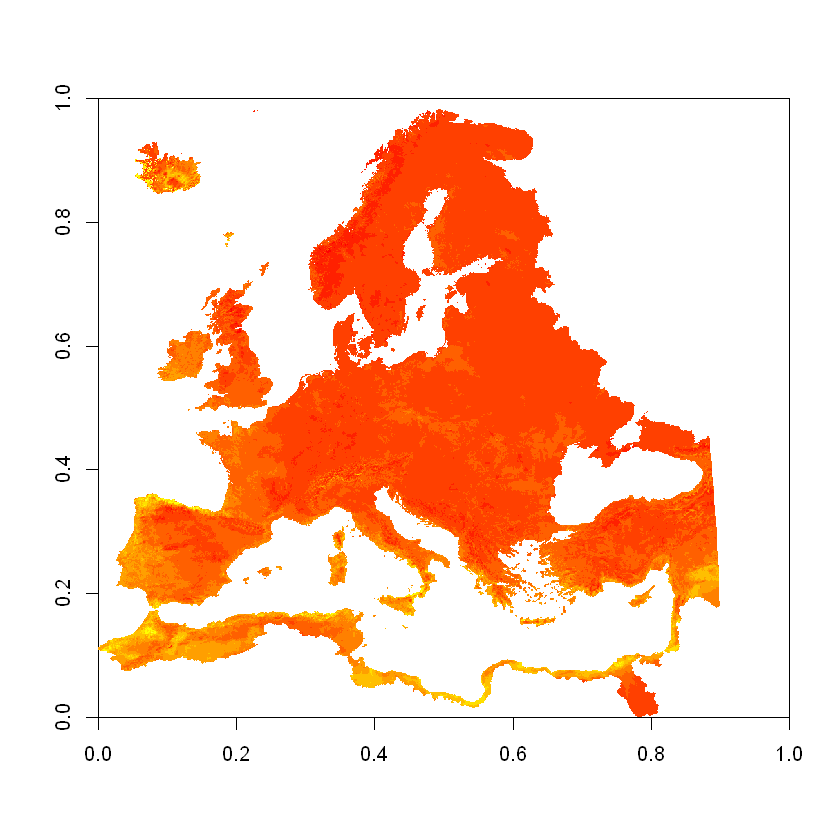

In [5]:

slice <- ncdf4::ncvar_get(nc, 'OUT_EVAP', start = c(1,1,1), count = c(-1,-1,1))
image(slice)